<a href="https://colab.research.google.com/github/Nachi2006/GrayScaleFashion/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset from CSV file...

Checking for missing values:
0 total missing values

=== Level 0: Data Loading and Initial Inspection ===
Training data shape: (48000, 28, 28)
Training labels shape: (48000,)


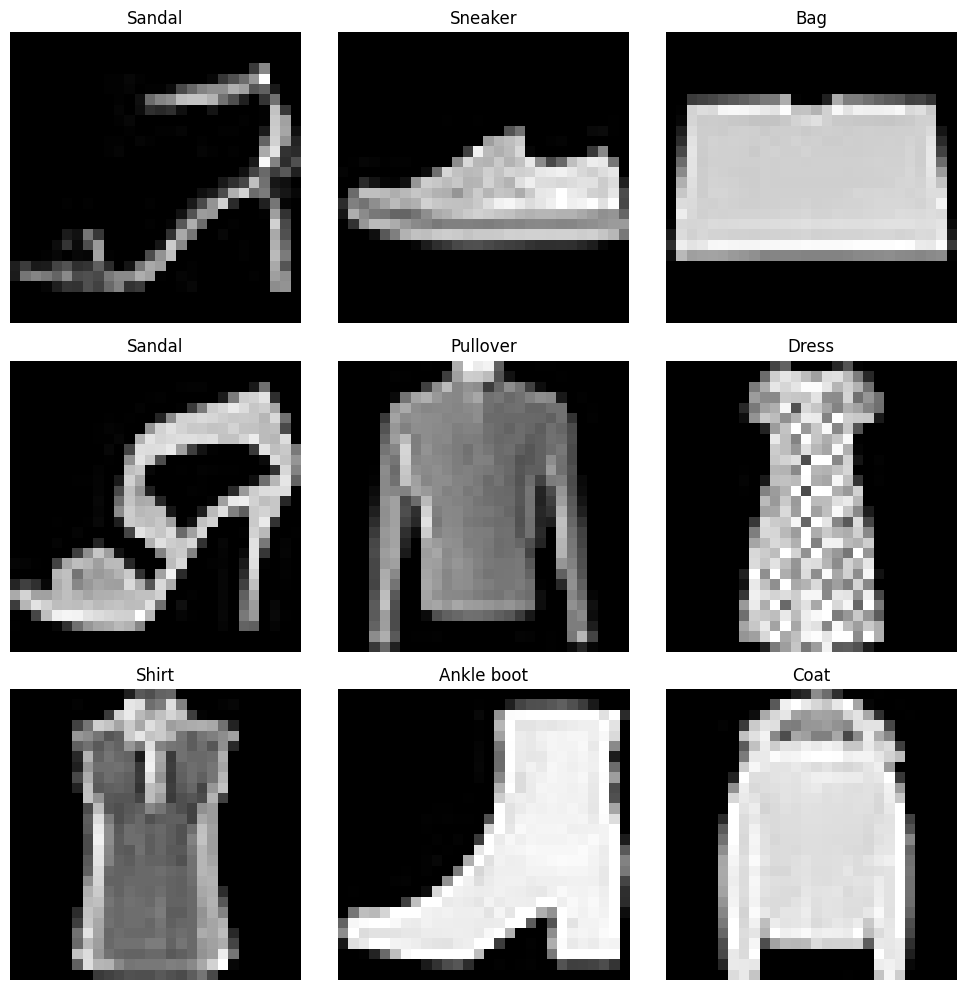


Verifying grayscale format:
Image data type: float64
Pixel value range: 0.0 to 255.0

=== Level 1: Exploratory Data Analysis ===


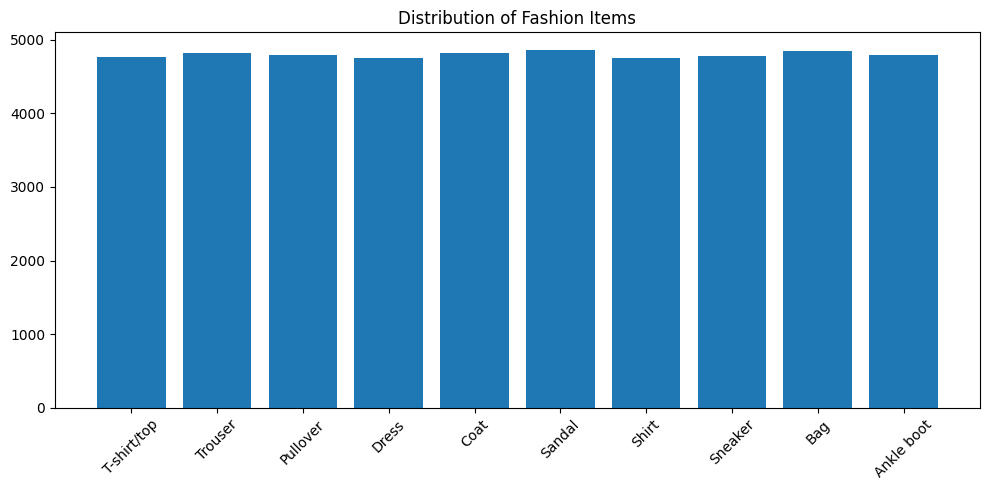

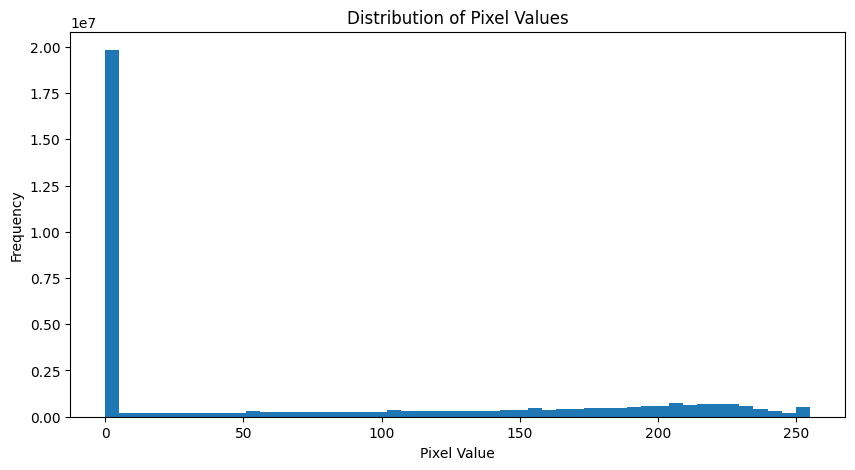


Pixel Statistics:
               Mean           Std      Min           Max
count  48000.000000  48000.000000  48000.0  48000.000000
mean      73.005070     81.665870      0.0    254.915958
std       32.140638     20.007024      0.0      0.277453
min        6.617347     16.525658      0.0    254.000000
25%       47.484056     66.960097      0.0    255.000000
50%       69.405612     84.524501      0.0    255.000000
75%       97.518176     98.136869      0.0    255.000000
max      191.820153    121.137271      0.0    255.000000

=== Level 2: Basic Classification Model ===

Logistic Regression Accuracy: 0.8505


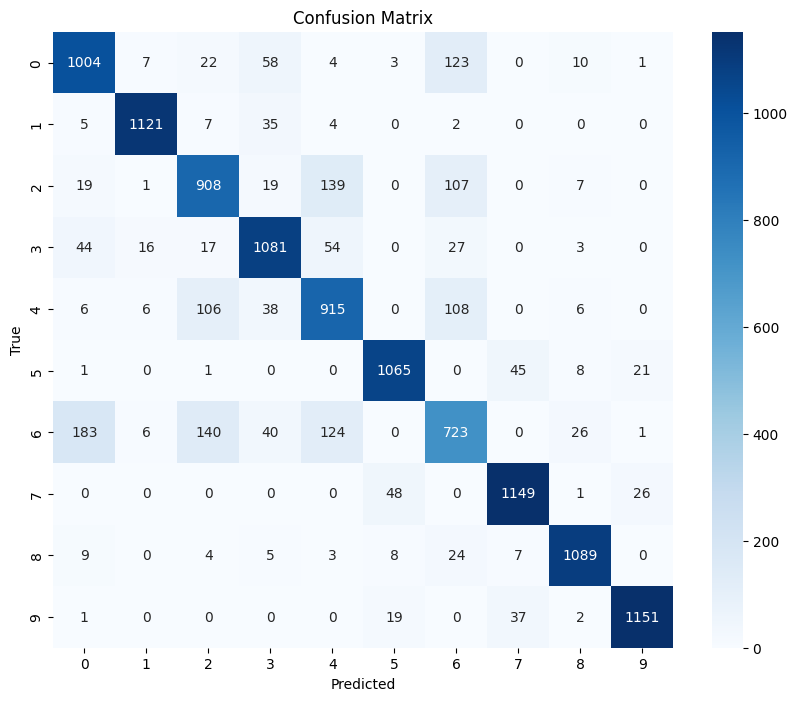


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.81      0.80      1232
     Trouser       0.97      0.95      0.96      1174
    Pullover       0.75      0.76      0.76      1200
       Dress       0.85      0.87      0.86      1242
        Coat       0.74      0.77      0.75      1185
      Sandal       0.93      0.93      0.93      1141
       Shirt       0.65      0.58      0.61      1243
     Sneaker       0.93      0.94      0.93      1224
         Bag       0.95      0.95      0.95      1149
  Ankle boot       0.96      0.95      0.96      1210

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000


=== Level 3: Neural Network Implementation ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6690 - loss: 0.9024 - val_accuracy: 0.8430 - val_loss: 0.4305
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.8495 - loss: 0.4053 - val_accuracy: 0.8685 - val_loss: 0.3681
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.8751 - loss: 0.3351 - val_accuracy: 0.8853 - val_loss: 0.3230
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.8939 - loss: 0.2894 - val_accuracy: 0.8901 - val_loss: 0.3035
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.9019 - loss: 0.2688 - val_accuracy: 0.8797 - val_loss: 0.3239
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9109 - loss: 0.2425 - val_accuracy: 0.8969 - val_loss: 0.2950
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9187 - loss: 0.2228 - val_accuracy: 0.9018 - val_loss: 0.2807
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.9257 - loss: 0.2000 - 

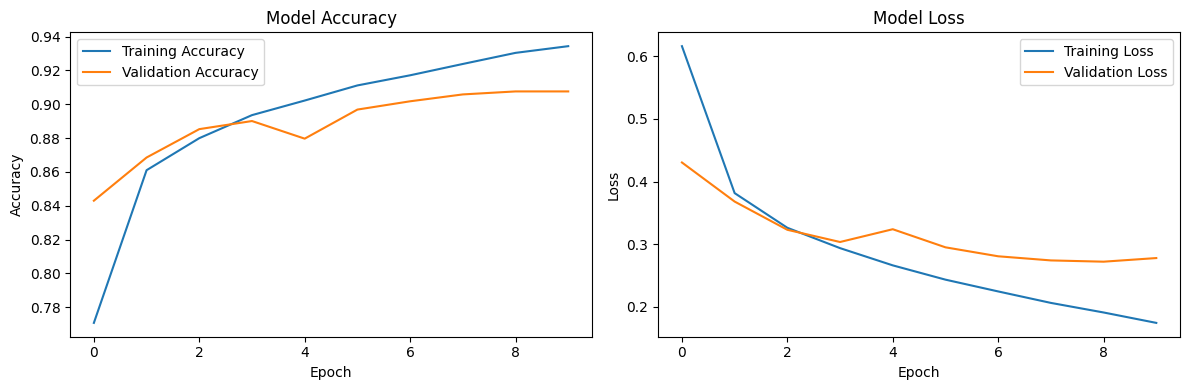

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9076 - loss: 0.2621

Test accuracy: 0.9066


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras import layers, models

# Load data from CSV file
def load_data():
    print("Loading dataset from CSV file...")
    # Load the CSV file
    data = pd.read_csv('/content/data.csv')

    # Check for NaN values
    print("\nChecking for missing values:")
    print(data.isnull().sum().sum(), "total missing values")

    # Fill NaN values with 0 (since 0 represents black pixels in images)
    data = data.fillna(0)

    # Separate features and labels
    y = data['label'].values
    X = data.drop('label', axis=1).values

    # Ensure all values are numeric
    X = X.astype(float)

    # Reshape images to 28x28
    X = X.reshape(-1, 28, 28)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return X_train, y_train, X_test, y_test, class_names

def level_0(X_train, y_train, class_names):
    print("\n=== Level 0: Data Loading and Initial Inspection ===")

    # Check dataset shape
    print(f"Training data shape: {X_train.shape}")
    print(f"Training labels shape: {y_train.shape}")

    # Display sample images
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(X_train))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(class_names[y_train[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Verify grayscale format
    print("\nVerifying grayscale format:")
    print(f"Image data type: {X_train.dtype}")
    print(f"Pixel value range: {X_train.min()} to {X_train.max()}")

def level_1(X_train, y_train, class_names):
    print("\n=== Level 1: Exploratory Data Analysis ===")

    # Distribution of classes
    plt.figure(figsize=(10, 5))
    unique, counts = np.unique(y_train, return_counts=True)
    plt.bar(range(len(unique)), counts)
    plt.title('Distribution of Fashion Items')
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.tight_layout()
    plt.show()

    # Pixel value distribution
    plt.figure(figsize=(10, 5))
    plt.hist(X_train.ravel(), bins=50)
    plt.title('Distribution of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

    # Summary statistics
    pixel_stats = pd.DataFrame({
        'Mean': np.mean(X_train, axis=(1,2)),
        'Std': np.std(X_train, axis=(1,2)),
        'Min': np.min(X_train, axis=(1,2)),
        'Max': np.max(X_train, axis=(1,2))
    })
    print("\nPixel Statistics:")
    print(pixel_stats.describe())

def level_2(X_train, y_train, X_test, y_test, class_names):
    print("\n=== Level 2: Basic Classification Model ===")

    # Preprocess data
    X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

    # Verify no NaN values
    if np.isnan(X_train_flat).any() or np.isnan(X_test_flat).any():
        print("Warning: NaN values found after preprocessing. Replacing with 0...")
        X_train_flat = np.nan_to_num(X_train_flat)
        X_test_flat = np.nan_to_num(X_test_flat)

    # Train Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_flat, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_flat)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

def level_3(X_train, y_train, X_test, y_test):
    print("\n=== Level 3: Neural Network Implementation ===")

    # Preprocess data
    X_train_norm = X_train.astype('float32') / 255.0
    X_test_norm = X_test.astype('float32') / 255.0

    # Replace any NaN values
    X_train_norm = np.nan_to_num(X_train_norm)
    X_test_norm = np.nan_to_num(X_test_norm)

    # Create CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compile and train
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train_norm.reshape(-1, 28, 28, 1),
                       y_train,
                       epochs=10,
                       validation_split=0.2,
                       batch_size=64)

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test_norm.reshape(-1, 28, 28, 1), y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")

def main():
    # Load data
    X_train, y_train, X_test, y_test, class_names = load_data()

    # Execute all levels
    level_0(X_train, y_train, class_names)
    level_1(X_train, y_train, class_names)
    level_2(X_train, y_train, X_test, y_test, class_names)
    level_3(X_train, y_train, X_test, y_test)

if __name__ == "__main__":
    main()
